# King County Renovation: Most Effective Ways to Increase the Value of Your Home 

**Author:** E. Berke Tezcan

***

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB/EXPLORE](#SCRUB/EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[CONCLUSIONS/RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

For this project, we were hired by a home owner in King County, Washington who wants to renovate their home. They would like us to analyze the real estate data of the county and give them insights as to what to focus their renovation efforts on in order to increase their property's value. 

Real estate prices are affected by a myriad of -what we can define as- internal parameters like the square footage, floor count, bedroom count, finishes, how many cars can fit into the garage etc. There are also parameters that we can define as external and can not (easily) be changed. These include attributes like zipcode, latitude, longitude, view from the house, and school districts. In order to accurately model and pinpoint the most important parameters that affect the sale price of a home, we need to incorporate both internal and external parameters.

We are given a dataset that includes information about the real estate in King County and will be using this dataset to create a multiple linear regression (MLR) model. We defined our goal to be to find the top 3 internal parameters that affect a home's sale price the most in King County specifically. This will ensure that the home owner can actually keep  these parameters in mind while renovating rather than getting insights about external parameters that they can't necessarily do anything to change.

# OBTAIN

## Data Understanding/EDA


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
pd.set_option('display.max_columns',0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#looking at unique values within the column to see if there are any out-of-place looking values.
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [6]:
#looking at unique values within the column to see if there are any out-of-place looking values.
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [7]:
#looking at unique values within the column to see if there are any out-of-place looking values.
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [8]:
#looking at unique values within the column to see if there are any out-of-place looking values.
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [9]:
#Checking to see how many unique homes we have in the dataset.
pd.DataFrame(df['id'].unique())

,0
0,7129300520
1,6414100192
2,5631500400
3,2487200875
4,1954400510
...,...
21415,263000018
21416,6600060120
21417,1523300141
21418,291310100


We have 21,597 individual home sales associated with 21,420 unique homes.

# SCRUB/EXPLORE

## Checking for and Addressing Null Values

In [10]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We have 3 columns with null values in them (waterfront, view and yr_renovated as shown above) which we will need to address.

### view Column - Null Values

In [11]:
df['view'].value_counts(dropna=False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

We can see that the majority (approx. 90%) of the data points have zeros for their view column value. Therefore, to address the missing values in the view column we can take the more conservative approach and say that these 63 houses/apartments did not have a view (had a value of 0) with minimal impact to the overall dataset since we have 21597 data points overall.

In [12]:
df['view'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### yr_renovated Column - Null Values

Prior to checking for null values, we should check to see if there are inconsistencies that we need to address between the yr_built and yr_renovated columns. For example, if both columns are filled in with the same year, that may indicate that one of the columns is incorrect and may need to be replaced with a 0. Another example would be if the yr_built column showed a larger year compared to the yr_renovated since this would suggest that the building was built after it was renovated which doesn't make sense.

In [13]:
df[df['yr_built']==df['yr_renovated']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [14]:
df[(df['yr_built']>df['yr_renovated']) & (df['yr_renovated']!=0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


We found no inconsistencies between the yr_built and yr_renovated columns and can carry on with addressing the null values in the yr_renovated column.

In [15]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

Similar to the view column, we are seeing that majority (approx. 79%) of the data points have 0 for their yr_renovated column value which we are making the assumption that the place was not renovated in this case. Chances are that the places with null values in the yr_renovated column were also not renovated, so we can go ahead and fill the null values with zeros in this case as well.

In [17]:
df['yr_renovated'].fillna(0, inplace=True)

In [18]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### waterfront Column - Null Values

In [19]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [20]:
df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

Similar to the other two columns we discussed, majority of the homes (approx. 88%) have 0 as their waterfront column value. Therefore we can assume that the 2,376 null values can also be filled with 0.

In [21]:
df['waterfront'].fillna(0, inplace=True)

In [22]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Addressing Placeholder Values

For some reason, unlike the other columns that have sqft information, the sqft_basement column's data type seems to be object instead of integer. If we want to be able to accurately use this column's information we need to change the dtype to int64 similar to other sqft columns. 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
df['sqft_basement'].dtype

dtype('O')

In order to find the reason we can take a quick look at the unique values that this column has. We expect to see an object (or better known as string) value that is different than all the other values.

In [25]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

It seems like the '?' values are being used as placeholder values and are causing the sqft_basement column to be a object type column. Let's take a quick look at how many '?' values there are.

In [26]:
df[df['sqft_basement']=='?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,4,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,3,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,3,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,3,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,3,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,3,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [27]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
935.0         1
666.0         1
2570.0        1
1852.0        1
243.0         1
Name: sqft_basement, Length: 304, dtype: int64

It seems like only 454 rows out of 21,597 have '?' as their value. Once again we see that majority (approx. 59%) of the values in this column have a value of 0. Therefore, taking the conservative approach, we can once again assume that these placeholder values are to have 0 values and change the dtype to int.

In [28]:
df['sqft_basement'] = df['sqft_basement'].map(lambda x: x.replace('?', '0') if x=='?' else x)
# df['sqft_basement'] = df['sqft_basement'].map(lambda x: int(float(x)))
df['sqft_basement'] = df['sqft_basement'].astype('float').astype('int64')

In [29]:
df['sqft_basement'].dtype

dtype('int64')

## Feature Engineering - renovated

Since the objective of our data analysis is to give homeowners 3 recommendations on how to renovate their homes, the yr_renovated column in this dataset is not very helpful and will not result in an actionable recommendation since homeowners can't go back in time to renovate their homes during the optimal years. Instead looking at whether a house was renovated or not may reveal more and reinforce the idea that renovated homes would have an increase in their value. Therefore, we should create a feature called 'renovated' based on the 'yr_renovated' column.

In [30]:
df['renovated'] = df['yr_renovated']!=0
df['renovated'] = df['renovated'].astype('int')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


## Feature Engineering - has_basement

We think that having a finished basement in a home may be a more important metric compared to how large the basement is in terms of sqft. Therefore we wanted to engineer a feature that would show whether the homes had a <u>finished</u> basement or not. During our EDA we noticed that sqft_living = sqft_above + sqft_basement. This would suggest that if a basement was unfinished and was not occupiable it was not included in the total livable sqft number which is denoted by sqft_living. Therefore, basements that were unfinished would have the same 0 value as homes without any basements. So we are assuming that the homes with 0's as their sqft_basement value, may still have a basement but that their basement would not be an occupiable, livable space. 

In [31]:
df['has_basement'] = df['sqft_basement']!=0
df['has_basement'] = df['has_basement'].astype('int')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,has_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0


## Checking for Duplicates

The best way to check for duplicated data for this dataset specifically is by using the 'id' column as each home was given a unique ID number. 

In [32]:
df[df['id'].duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,has_basement
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500,0,1
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244,0,1
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280,1922,1984.0,98146,47.4957,-122.352,1820,7460,1,1
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,3,6,1000,0,1943,0.0,98178,47.4897,-122.240,1020,7138,0,0
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,5,7,1100,1080,1954,0.0,98133,47.7711,-122.341,1810,6929,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0.0,0.0,3,9,2910,0,2012,0.0,98065,47.5168,-121.883,2910,5260,0,0
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0.0,0.0,3,7,990,10,2004,0.0,98118,47.5419,-122.271,1330,1466,0,1
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0.0,0.0,3,8,2680,0,2013,0.0,98045,47.4759,-121.734,2680,5992,0,0
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,3,7,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598,0,0


There are duplicated entries for the same houses but since these are additional sales of the same house, they are valid data points and there is no reason to drop them. So we will be leaving these duplicates in our dataset as they will give us a more complete picture of the market.

## Linearity Check

Since we were specifically asked to use an MLR model for this project, we need to address the assumptions of this model to make sure that the model is accurate. One of the assumptions for the model is that the parameters we will be using to infer price need to have a linear relationship against price.

### Checking for Linearity of Parameters

In [33]:
import seaborn as sns

def plot(df, target='price'):
    fig, ax = plt.subplots(nrows = len(df.columns), figsize=(10,200))
    
    for i, col in enumerate(df.columns):
#         sns.lmplot(x=col, y=target, data=df)
        ax[i].scatter(df[col], df[target])
        ax[i].set_xlabel(col)
        ax[i].set_ylabel(target)
        ax[i].set_title(f"{col} vs. {target}")
        

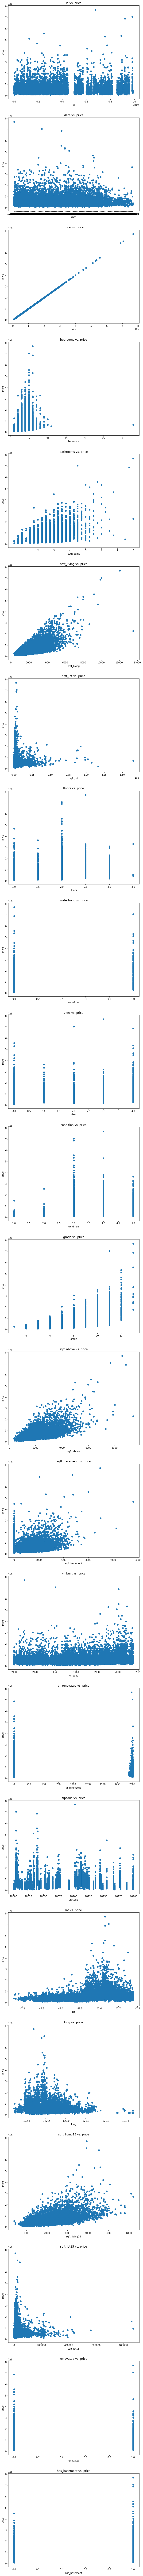

In [34]:
plot(df=df, target='price')

It seems as though there are certain columns that do **not** have a linear relationship with price. Based on the above scatter plots, at first glance, sqft_lot, sqft_lot15, bedrooms, floors, condition, and zipcode all have non-linear relationships with price. However, since we are to use an MLR model and would like to keep this information in to begin with, and then iteratively drop them if our models suggest high p-values, we will keep these columns as they are for the time being. The only exception is for categorical columns which we will need to one hot encode. Zipcode is clearly a categorical column that will need to be one hot encoded. It can be argued that columns such as grade, condition and bedrooms etc. can be treated as categorical columns but we can explore this later. Lastly, we can be treat the the binary columns such as has_basement and renovated as they are already one hot encoded.

### One Hot Encoding - zipcode

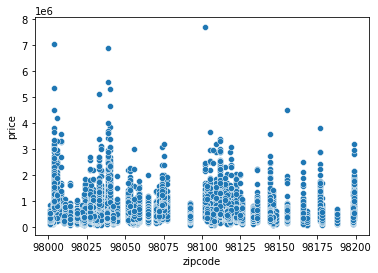

In [35]:
sns.scatterplot(x=df['zipcode'], y=df['price']);

Zipcode is clearly a categorical column with no linear relationship with our target: 'price'. In order to keep this information in our model, we need to one hot encode this column.

In [36]:
encoder = OneHotEncoder(sparse=False, drop='first')
cat_cols=['zipcode']
data_ohe = encoder.fit_transform(df[cat_cols])
df_ohe = pd.DataFrame(data_ohe, columns=encoder.get_feature_names(cat_cols), index=df.index)
df_ohe

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_ohe = pd.concat([df.drop('zipcode', axis=1), df_ohe], axis=1)
df_ohe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovated,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,47.5112,-122.257,1340,5650,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,47.7210,-122.319,1690,7639,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,47.7379,-122.233,2720,8062,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,47.5208,-122.393,1360,5000,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,47.6168,-122.045,1800,7503,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,2009,0.0,47.6993,-122.346,1530,1509,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,2014,0.0,47.5107,-122.362,1830,7200,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,2009,0.0,47.5944,-122.299,1020,2007,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,

## Multicollinearity Check

### Correlation Matrices - Before

It looks like there is multicollinearity between the different columns. To address these I will be creating matrices and removing columns that may be causing the issues.

#### With Target Column: price

In [38]:
df.drop(['id', 'date'], axis=1, inplace=True)

<AxesSubplot:>

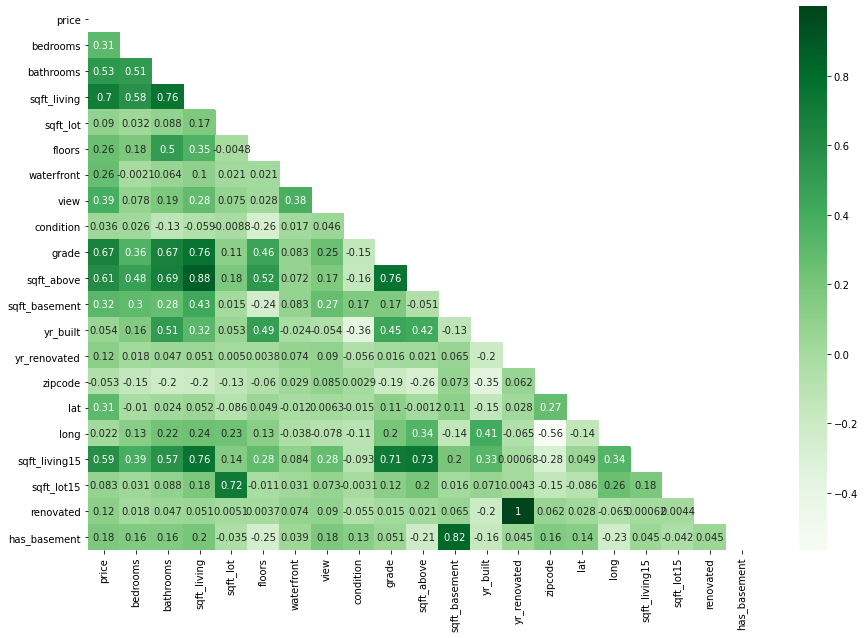

In [39]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, mask=mask, cmap='Greens')

In [40]:
df.corr()['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
has_basement     0.178264
yr_renovated     0.117855
renovated        0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
Name: price, dtype: float64

#### Without Target Column: price

<AxesSubplot:>

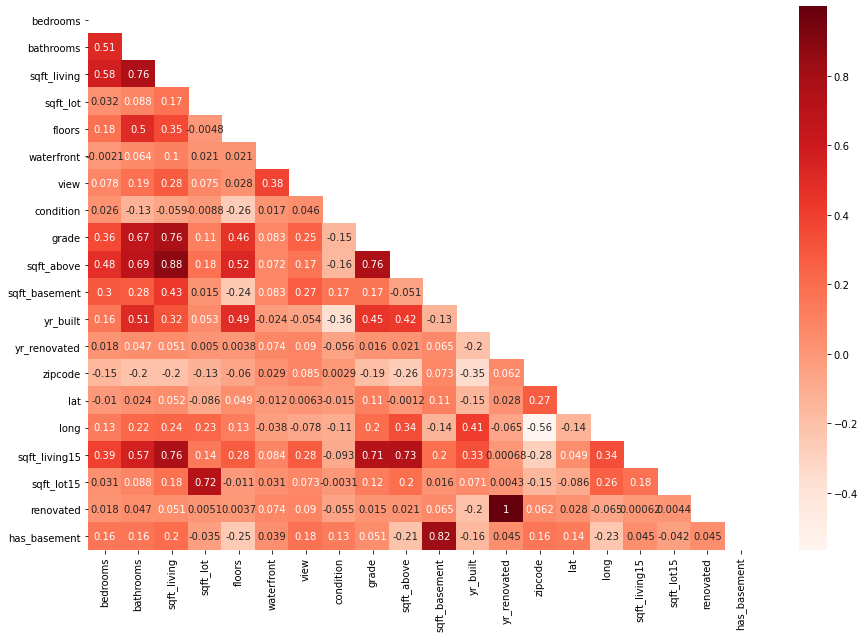

In [41]:
mask = np.zeros_like(df.drop('price', axis=1).corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.drop('price', axis=1).corr(),annot=True, mask=mask, cmap='Reds')

Looking at the correlation matrix of the original df (prior to being one hot encoded for simplicity of the visual), there seems to be strong correlations between a multitude of parameters when we take our cut-off point as 0.75. Dropping the 'sqft_living' column will allow us to clear almost all the strong correlations. We are additionally not losing meaningful data since this column is equal to the sum of 'sqft_above' and 'sqft_basement'.

In [42]:
df.drop('sqft_living', axis=1, inplace=True)

Since we have engineered a feature called 'has_basement' using 'sqft_basement' there is a high correlation between these columns as well. Since we are still keeping the basement information to a certain degree, we can also drop 'sqft_basement'

In [43]:
df.drop('sqft_basement', axis=1, inplace=True)

Similar to above, since we have engineered the column 'renovated' using 'yr_renovated', we can also drop the 'yr_renovated' column.

In [44]:
df.drop('yr_renovated', axis=1, inplace=True)

### Correlation Matrix - After

<AxesSubplot:>

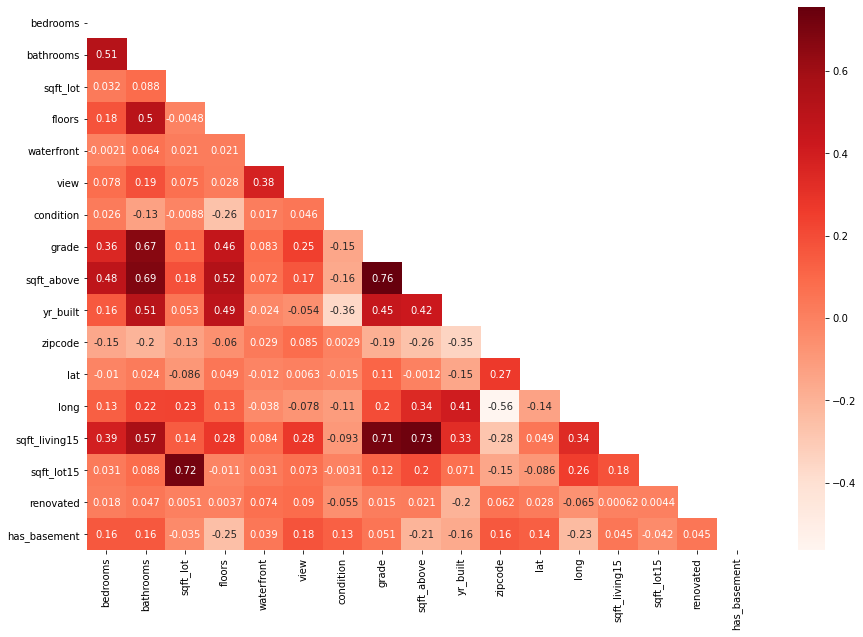

In [45]:
mask = np.zeros_like(df.drop('price', axis=1).corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.drop('price', axis=1).corr(),annot=True, mask=mask, cmap='Reds')

Our correlation matrix looks much better with the exception of 'sqft_above' and 'grade'. As this value is so close to our cut-off value of 0.75, we will be keeping it in to see if it causes any additional issues after adjustments to the model.

# MODEL 

## Defining the Modelling Function - model_lin_reg

We are ready to fit the data with a linear regression model now. We chose this model because we were specifically asked to use this model. Since the building and improving on the model will be an iterative process, we can write a function that will not only create the model but also show us our QQ Plot as well as the residual information so we can check for normality and homoscedasticity.

In [46]:
def model_lin_reg(df, target='price'):
    
    features = ' + '.join(df.drop(target, axis=1).columns)
    f  = f"{target}~"+features
    model = smf.ols(f, df).fit()
    display(model.summary())
    fig, ax = plt.subplots(ncols=2, figsize=(15,5))
    sm.graphics.qqplot(model.resid,line='45',fit=True, ax=ax[0])
    sns.scatterplot(x=model.predict(df, transform=True), y=model.resid, ax=ax[1])
    ax[1].set_ylabel('Residuals')
    ax[1].set_xlabel('Predicted')
    plt.axhline();
    return model

In [47]:
drop_cols = ['id', 'date', 'sqft_living', 'sqft_basement', 'yr_renovated']
df_ohe.drop(drop_cols, axis=1, inplace=True)

## Model #1 - Baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1010.
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:20   Log-Likelihood:            -2.9003e+05
No. Observations:               21597   AIC:                         5.802e+05
Df Residuals:                   21511   BIC:                         5.809e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.422e+07    6.3e+06     -3.845      0.000   -3.66e+07   -1.19e+07
bedrooms      -1.763e+04   1544.455    -11.413      0.000   -2.07e+04   -1.46e+04
bathrooms      4.377e+04   2643.295     16.557      0.000    3.86e+04    4.89e+04
sqft_lot          0.2560      0.039      6.499      0.000       0.179       0.333
floors        -6.367e+04   3189.871    -19.961      0.000   -6.99e+04   -5.74e+04
waterfront     6.937e+05   1.51e+04     46.012      0.000    6.64e+05    7.23e+05
view           6.292e+04   1770.266     35.543      0.000    5.95e+04    6.64e+04
condition      2.922e+04   1965.696     14.866      0.000    2.54e+04    3.31e+04
grade          6.338e+04   1864.517     33.994      0.000    5.97e+04     6.7e+04
sqft_above      190.3529      3.131     60.789      0.000     184.215     196.491
yr_built       -861.1302     65.764    -13.094      0.000    -990.033    -732.228
lat            2.032e+05    6.5e+04      3.125      0.002    7.58e+04    3.31e+05
long          -1.284e+05   4.67e+04     -2.749      0.006    -2.2e+05   -3.69e+04
sqft_living15    21.3812      2.944      7.264      0.000      15.612      27.151
sqft_lot15       -0.0880      0.062     -1.418      0.156      -0.210       0.034
renovated      4.037e+04   6547.392      6.166      0.000    2.75e+04    5.32e+04
has_basement   6.225e+04   3093.061     20.124      0.000    5.62e+04    6.83e+04
zipcode_98002  3.318e+04   1.48e+04      2.236      0.025    4093.329    6.23e+04
zipcode_98003 -2.615e+04   1.33e+04     -1.971      0.049   -5.22e+04    -149.702
zipcode_98004  7.234e+05   2.41e+04     30.009      0.000    6.76e+05    7.71e+05
zipcode_98005  2.487e+05   2.58e+04      9.653      0.000    1.98e+05    2.99e+05
zipcode_98006  2.355e+05   2.11e+04     11.178      0.000    1.94e+05    2.77e+05
zipcode_98007  1.937e+05   2.66e+04      7.286      0.000    1.42e+05    2.46e+05
zipcode_98008  2.025e+05   2.53e+04      8.018      0.000    1.53e+05    2.52e+05
zipcode_98010  9.554e+04   2.26e+04      4.223      0.000    5.12e+04     1.4e+05
zipcode_98011  3.791e+04   3.29e+04      1.154      0.249   -2.65e+04    1.02e+05
zipcode_98014  8.408e+04   3.61e+04      2.330      0.020    1.33e+04    1.55e+05
zipcode_98019  4.459e+04   3.56e+04      1.253      0.210   -2.52e+04    1.14e+05
zipcode_98022  3.069e+04   1.97e+04      1.562      0.118   -7832.522    6.92e+04
zipcode_98023 -4.989e+04   1.22e+04     -4.088      0.000   -7.38e+04    -2.6e+04
zipcode_98024  1.431e+05   3.18e+04      4.504      0.000    8.08e+04    2.05e+05
zipcode_98027  1.547e+05   2.16e+04      7.153      0.000    1.12e+05    1.97e+05
zipcode_98028  3.521e+04   3.19e+04      1.103      0.270   -2.73e+04    9.77e+04
zipcode_98029  1.881e+05   2.47e+04      7.614      0.000     1.4e+05    2.36e+05
zipcode_98030 -1278.3007   1.46e+04     -0.088   

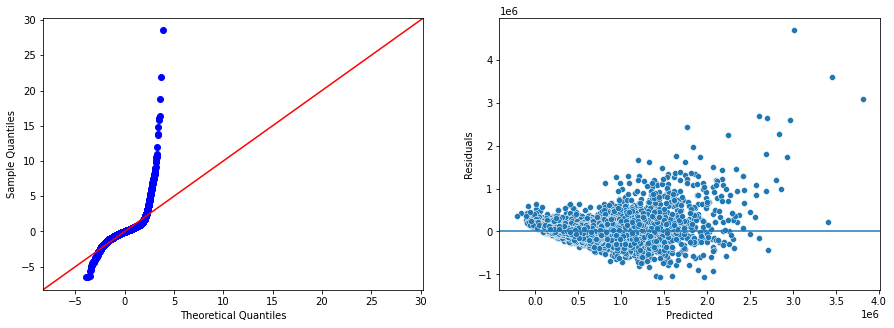

In [48]:
model_lin_reg(df=df_ohe)

Our baseline model has an R-squared value of 0.800 and an adjusted R-squared value of 0.799, which is fairly high. These will be two of various metrics we will be keeping an eye on to see how our model improves through iterations. 

Another metric we will be looking for will be the p-values of our parameters (columns). If they are found insignificant (based on an alpha level of 0.05) we will be dropping these columns. In our baseline model, we are seeing that the sqft_lot15 columns has a higher p-value than 0.05 so its coefficient (its effect on our target) is not statistically significant and we can drop this column in its entirety.

The final metric are the residuals and how they fare with the MLR model's assumptions of normality and homoscedasticity. We are seeing here that they are definitely not normal according to our QQ plot and they are heteroscedastic. So, we are far from being done with our model.

As discussed above, sqft_lot15 p-value is higher than our alpha of 0.05 meaning that this coefficient is not statistically significant, so we can go ahead and drop this parameter.

In [49]:
df_ohe.drop('sqft_lot15', axis=1, inplace=True)

## Feature Engineering - has_larger_sqft_than_neighbors

We also wanted to create a feature to see if having a larger sqft (excluding the basement) would have any effect on the sale price of the home.

In [50]:
df_ohe['has_larger_sqft_than_neighbors'] = df_ohe['sqft_living15'] < df_ohe['sqft_above']
df_ohe['has_larger_sqft_than_neighbors'] = df_ohe['has_larger_sqft_than_neighbors'].astype('int')
df_ohe.drop('sqft_living15', axis=1, inplace=True)
df_ohe['has_larger_sqft_than_neighbors'].value_counts()

0    15756
1     5841
Name: has_larger_sqft_than_neighbors, dtype: int64

Let's see how our model changed after we removed the statistically insignificant column 'sqft_lot15' and added the new feature 'has_larger_sqft_than_neighbors'.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1027.
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:21   Log-Likelihood:            -2.8999e+05
No. Observations:               21597   AIC:                         5.801e+05
Df Residuals:                   21512   BIC:                         5.808e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2.425e+07   6.28e+06     -3.863      0.000   -3.66e+07   -1.19e+07
bedrooms                        -1.68e+04   1541.928    -10.899      0.000   -1.98e+04   -1.38e+04
bathrooms                       4.332e+04   2638.007     16.422      0.000    3.82e+04    4.85e+04
sqft_lot                           0.2141      0.030      7.166      0.000       0.156       0.273
floors                         -6.274e+04   3179.284    -19.734      0.000    -6.9e+04   -5.65e+04
waterfront                      6.911e+05    1.5e+04     45.966      0.000    6.62e+05    7.21e+05
view                             6.39e+04   1737.190     36.784      0.000    6.05e+04    6.73e+04
condition                       2.946e+04   1960.975     15.022      0.000    2.56e+04    3.33e+04
grade                           6.282e+04   1829.256     34.343      0.000    5.92e+04    6.64e+04
sqft_above                       213.2508      3.187     66.919      0.000     207.005     219.497
yr_built                        -881.6538     65.484    -13.464      0.000   -1010.006    -753.301
lat                             1.978e+05   6.49e+04      3.048      0.002    7.06e+04    3.25e+05
long                           -1.312e+05   4.65e+04     -2.819      0.005   -2.22e+05      -4e+04
renovated                       4.136e+04   6531.960      6.332      0.000    2.86e+04    5.42e+04
has_basement                    6.363e+04   3051.663     20.850      0.000    5.76e+04    6.96e+04
zipcode_98002                   3.298e+04   1.48e+04      2.228      0.026    3963.897     6.2e+04
zipcode_98003                  -2.736e+04   1.32e+04     -2.067      0.039   -5.33e+04   -1414.683
zipcode_98004                   7.254e+05    2.4e+04     30.163      0.000    6.78e+05    7.72e+05
zipcode_98005                   2.515e+05   2.57e+04      9.786      0.000    2.01e+05    3.02e+05
zipcode_98006                   2.386e+05    2.1e+04     11.363      0.000    1.97e+05     2.8e+05
zipcode_98007                   1.964e+05   2.65e+04      7.405      0.000    1.44e+05    2.48e+05
zipcode_98008                   2.039e+05   2.52e+04      8.092      0.000    1.55e+05    2.53e+05
zipcode_98010                   9.662e+04   2.26e+04      4.281      0.000    5.24e+04    1.41e+05
zipcode_98011                   4.068e+04   3.28e+04      1.241      0.215   -2.36e+04    1.05e+05
zipcode_98014                   8.781e+04    3.6e+04      2.438      0.015    1.72e+04    1.58e+05
zipcode_98019                   4.763e+04   3.55e+04      1.341      0.180    -2.2e+04    1.17e+05
zipcode_98022                   3.037e+04   1.96e+04      1.548      0.122   -8073.985    6.88e+04
zipcode_98023                  -5.138e+04   1.22e+04     -4.219      0.000   -7.53e+04   -2.75e+04
zipcode_98024 

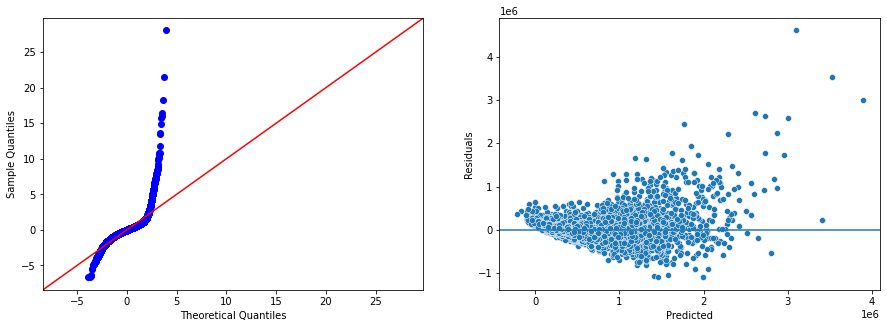

In [51]:
model_lin_reg(df=df_ohe)

We can now see that our R-squared value for this iteration ended up staying the same at 0.800 and our adjusted R-sqaured value improved to 0.800 as well after we removed 'sqft_lot15'. We don't have any remaining issues for the p-values and as we can see our residuals still seem to not be fitting the normality and homoscedasticity assumptions. To address this we can move on to the outlier removal process.

## Outlier Removal

In [52]:
#Outlier Removal with the IQR method

def find_outliers_IQR(data):
    """Use Tukey's Method of outlier removal AKA InterQuartile-Range Rule
    and return boolean series where True indicates it is an outlier.
    - Calculates the range between the 75% and 25% quartiles
    - Outliers fall outside upper and lower limits, using a treshold of  1.5*IQR the 75% and 25% quartiles.

    IQR Range Calculation:    
        res = df.describe()
        IQR = res['75%'] -  res['25%']
        lower_limit = res['25%'] - 1.5*IQR
        upper_limit = res['75%'] + 1.5*IQR

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
        
    EXAMPLE USE: 
    >> idx_outs = find_outliers_df(df['AdjustedCompensation'])
    >> good_data = df[~idx_outs].copy()
    
    function snippet from Flatiron School Phase #2 Py Files.
    URL = https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/py_files/functions_SG.py
    
    """
    df_b=data
    res= df_b.describe()

    IQR = res['75%'] -  res['25%']
    lower_limit = res['25%'] - 1.5*IQR
    upper_limit = res['75%'] + 1.5*IQR

    idx_outs = (df_b>upper_limit) | (df_b<lower_limit)

    return idx_outs


In [53]:
#Making a copy of df_ohe for the second outlier removal process. Refer to next section.
df_IQR_price = df_ohe.copy()
df_IQR_price

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,renovated,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_larger_sqft_than_neighbors
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,1955,47.5112,-122.257,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,1951,47.7210,-122.319,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,1933,47.7379,-122.233,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,1965,47.5208,-122.393,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,1987,47.6168,-122.045,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,1530,2009,47.6993,-122.346,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21593,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,2310,2014,47.5107,-122.362,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21594,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,1020,2009,47.5944,-122.299,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#### Cleaning Outliers From All Numeric Columns

In [54]:
cols_to_check = ['price', 'bedrooms','bathrooms', 'sqft_lot', 'grade', 'sqft_above', 'condition']

In [55]:
for col in cols_to_check:
    df_ohe = df_ohe[find_outliers_IQR(df_ohe[col])==False]
    
df_ohe

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,renovated,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_larger_sqft_than_neighbors
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,1955,47.5112,-122.257,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,1951,47.7210,-122.319,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,1933,47.7379,-122.233,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,1965,47.5208,-122.393,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,1987,47.6168,-122.045,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,1530,2009,47.6993,-122.346,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21593,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,2310,2014,47.5107,-122.362,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21594,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,1020,2009,47.5944,-122.299,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

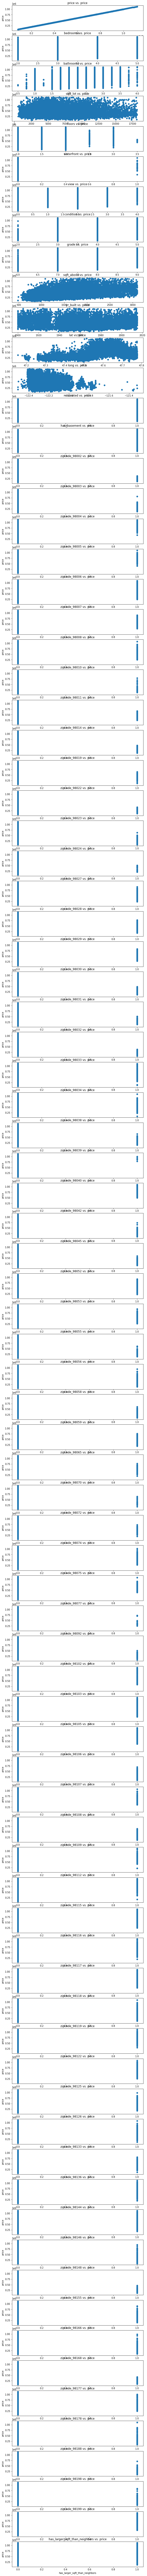

In [56]:
#checking the linearity between parameters after outlier removal
plot(df=df_ohe, target='price')

### Model 2.1 - Addressing Outliers

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     890.9
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:36   Log-Likelihood:            -2.1045e+05
No. Observations:               16556   AIC:                         4.211e+05
Df Residuals:                   16471   BIC:                         4.217e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.459e+06   4.28e+06     -0.341      0.733   -9.85e+06    6.94e+06
bedrooms                        2970.0115   1032.190      2.877      0.004     946.808    4993.215
bathrooms                       2.089e+04   1587.628     13.158      0.000    1.78e+04     2.4e+04
sqft_lot                           1.9798      0.268      7.380      0.000       1.454       2.506
floors                         -2.331e+04   1931.424    -12.066      0.000   -2.71e+04   -1.95e+04
waterfront                      2.397e+05   1.88e+04     12.747      0.000    2.03e+05    2.77e+05
view                            4.034e+04   1180.302     34.180      0.000     3.8e+04    4.27e+04
condition                       2.517e+04   1104.208     22.795      0.000     2.3e+04    2.73e+04
grade                             4.6e+04   1243.293     37.000      0.000    4.36e+04    4.84e+04
sqft_above                       139.7277      2.321     60.207      0.000     135.179     144.277
yr_built                        -591.2032     38.117    -15.510      0.000    -665.916    -516.490
lat                            -4840.7162   4.02e+04     -0.120      0.904   -8.36e+04    7.39e+04
long                           -1.989e+04   3.25e+04     -0.613      0.540   -8.35e+04    4.37e+04
renovated                       3.521e+04   3896.615      9.037      0.000    2.76e+04    4.28e+04
has_basement                    4.734e+04   1730.499     27.359      0.000     4.4e+04    5.07e+04
zipcode_98002                   6751.8751   8013.648      0.843      0.399   -8955.740    2.25e+04
zipcode_98003                  -2498.5176   7128.191     -0.351      0.726   -1.65e+04    1.15e+04
zipcode_98004                   5.278e+05   1.51e+04     35.017      0.000    4.98e+05    5.57e+05
zipcode_98005                   3.347e+05   1.54e+04     21.725      0.000    3.05e+05    3.65e+05
zipcode_98006                   2.806e+05   1.28e+04     21.865      0.000    2.55e+05    3.06e+05
zipcode_98007                    2.48e+05   1.58e+04     15.711      0.000    2.17e+05    2.79e+05
zipcode_98008                   2.408e+05   1.52e+04     15.812      0.000    2.11e+05    2.71e+05
zipcode_98010                    8.48e+04   1.61e+04      5.271      0.000    5.33e+04    1.16e+05
zipcode_98011                   1.502e+05   1.98e+04      7.596      0.000    1.11e+05    1.89e+05
zipcode_98014                   1.139e+05   2.52e+04      4.518      0.000    6.45e+04    1.63e+05
zipcode_98019                   1.076e+05    2.2e+04      4.895      0.000    6.45e+04    1.51e+05
zipcode_98022                   1843.3567   1.28e+04      0.144      0.886   -2.33e+04    2.69e+04
zipcode_98023                  -1.568e+04   6912.313     -2.269      0.023   -2.92e+04   -2136.085
zipcode_98024 

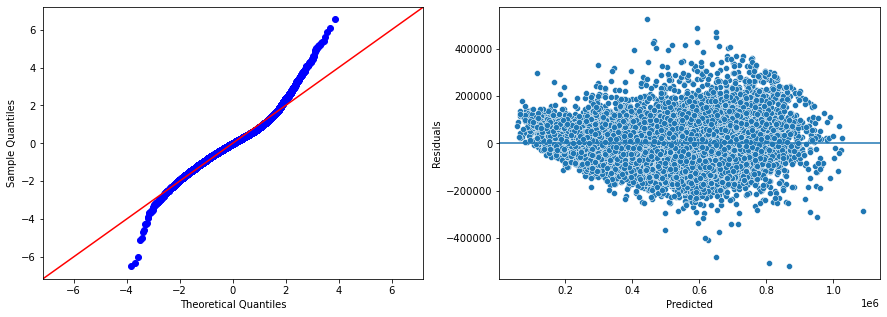

In [57]:
model = model_lin_reg(df=df_ohe)

In [58]:
model.pvalues[model.pvalues>0.05]

Intercept        0.733445
lat              0.904094
long             0.540053
zipcode_98002    0.399494
zipcode_98003    0.725959
zipcode_98022    0.885568
zipcode_98030    0.346645
zipcode_98031    0.107387
zipcode_98032    0.456204
dtype: float64

Our model's R-squared and adjusted R-sqaured values improved to 0.820 and 0.819 respectively compared to our baseline model's 0.800 and 0.799. From our p-values, we can see that the latitude and longitude values are insignificant which means that we can go ahead and drop these coefficients. Our residuals are also looking more normal and homoscedastic compared to the baseline model's residuals.

In [59]:
df_ohe.drop(['lat','long'], axis=1, inplace=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:37   Log-Likelihood:            -2.1045e+05
No. Observations:               16556   AIC:                         4.211e+05
Df Residuals:                   16473   BIC:                         4.217e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       7.453e+05   7.43e+04     10.028      0.000       6e+05    8.91e+05
bedrooms                        2967.3423   1032.116      2.875      0.004     944.283    4990.401
bathrooms                       2.089e+04   1587.508     13.159      0.000    1.78e+04     2.4e+04
sqft_lot                           1.9769      0.268      7.371      0.000       1.451       2.503
floors                         -2.329e+04   1930.880    -12.061      0.000   -2.71e+04   -1.95e+04
waterfront                      2.398e+05   1.88e+04     12.752      0.000    2.03e+05    2.77e+05
view                            4.036e+04   1179.978     34.201      0.000     3.8e+04    4.27e+04
condition                       2.516e+04   1103.866     22.796      0.000     2.3e+04    2.73e+04
grade                           4.602e+04   1242.410     37.043      0.000    4.36e+04    4.85e+04
sqft_above                       139.7018      2.320     60.210      0.000     135.154     144.250
yr_built                        -591.9980     38.092    -15.541      0.000    -666.663    -517.333
renovated                       3.518e+04   3896.042      9.030      0.000    2.75e+04    4.28e+04
has_basement                    4.735e+04   1730.358     27.365      0.000     4.4e+04    5.07e+04
zipcode_98002                   5621.7555   7796.170      0.721      0.471   -9659.580    2.09e+04
zipcode_98003                  -1734.1376   7011.609     -0.247      0.805   -1.55e+04     1.2e+04
zipcode_98004                   5.249e+05   8553.918     61.369      0.000    5.08e+05    5.42e+05
zipcode_98005                   3.313e+05   9253.837     35.803      0.000    3.13e+05    3.49e+05
zipcode_98006                    2.77e+05   6768.602     40.926      0.000    2.64e+05     2.9e+05
zipcode_98007                   2.439e+05   9008.742     27.077      0.000    2.26e+05    2.62e+05
zipcode_98008                   2.362e+05   7104.393     33.253      0.000    2.22e+05     2.5e+05
zipcode_98010                   7.967e+04   1.38e+04      5.785      0.000    5.27e+04    1.07e+05
zipcode_98011                   1.466e+05   7965.911     18.408      0.000    1.31e+05    1.62e+05
zipcode_98014                   1.033e+05   1.35e+04      7.655      0.000    7.69e+04     1.3e+05
zipcode_98019                   9.954e+04   8480.295     11.737      0.000    8.29e+04    1.16e+05
zipcode_98022                  -3106.2087   8379.925     -0.371      0.711   -1.95e+04    1.33e+04
zipcode_98023                   -1.38e+04   6195.130     -2.227      0.026   -2.59e+04   -1654.491
zipcode_98024                   1.233e+05   1.78e+04      6.908      0.000    8.83e+04    1.58e+05
zipcode_98027                   2.265e+05   7533.833     30.059      0.000    2.12e+05    2.41e+05
zipcode_98028 

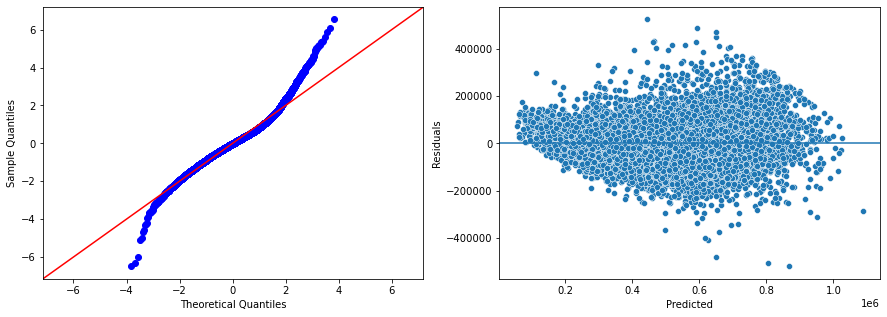

In [60]:
model = model_lin_reg(df=df_ohe)

After removing the lat and long columns due to high p-values, our model's R-squared values haven't changed but once again we are seeing that the residuals are better fitting the normality and homoscedasticity assumptions thanks to the IQR outlier removal process. 

In [61]:
df_ohe

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,renovated,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_larger_sqft_than_neighbors
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,1955,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,1951,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,1933,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,1965,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,1987,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,1530,2009,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21593,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,2310,2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21594,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,1020,2009,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Since we removed outliers from all numeric columns including our target 'price', we are left with 16556 rows compared to the 21597 we started off with. It makes more sense to remove outliers based on the prices of the homes rather than removing outliers in every single column. This has a potential upside of allowing for there to be more data points and therefore a more accurate model overall.

#### Removing Outliers Based on Price Only

In [62]:
df_IQR_price = df_IQR_price[find_outliers_IQR(df_IQR_price['price'])==False]
df_IQR_price

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,renovated,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_larger_sqft_than_neighbors
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,1955,47.5112,-122.257,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,1951,47.7210,-122.319,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,1933,47.7379,-122.233,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,1965,47.5208,-122.393,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,1987,47.6168,-122.045,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,1530,2009,47.6993,-122.346,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21593,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,2310,2014,47.5107,-122.362,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21594,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,1020,2009,47.5944,-122.299,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

As seen above, we are left with approximately 4,000 more data points when we only remove outliers based on price. We still should take a look at the model and whether the residuals have adjusted similarly to the prior model.

### Model 2.2 - Addressing Outliers

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1152.
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:38   Log-Likelihood:            -2.6138e+05
No. Observations:               20439   AIC:                         5.229e+05
Df Residuals:                   20354   BIC:                         5.236e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.461e+07   3.39e+06     -4.308      0.000   -2.13e+07   -7.96e+06
bedrooms                        -244.3677    850.207     -0.287      0.774   -1910.842    1422.106
bathrooms                        1.95e+04   1472.657     13.242      0.000    1.66e+04    2.24e+04
sqft_lot                           0.3002      0.017     17.975      0.000       0.268       0.333
floors                         -2.479e+04   1761.730    -14.073      0.000   -2.82e+04   -2.13e+04
waterfront                      1.501e+05   1.31e+04     11.488      0.000    1.24e+05    1.76e+05
view                            3.731e+04   1052.530     35.448      0.000    3.52e+04    3.94e+04
condition                         2.5e+04   1068.482     23.400      0.000    2.29e+04    2.71e+04
grade                           4.831e+04   1030.415     46.879      0.000    4.63e+04    5.03e+04
sqft_above                       131.7060      1.883     69.954      0.000     128.016     135.396
yr_built                        -572.7285     36.232    -15.807      0.000    -643.747    -501.710
lat                             1.545e+05   3.51e+04      4.402      0.000    8.57e+04    2.23e+05
long                           -6.569e+04   2.51e+04     -2.621      0.009   -1.15e+05   -1.66e+04
renovated                        3.36e+04   3726.684      9.017      0.000    2.63e+04    4.09e+04
has_basement                    4.727e+04   1670.349     28.300      0.000     4.4e+04    5.05e+04
zipcode_98002                   6083.3919   7819.865      0.778      0.437   -9244.173    2.14e+04
zipcode_98003                  -1.129e+04   6991.183     -1.615      0.106    -2.5e+04    2411.862
zipcode_98004                   4.749e+05   1.37e+04     34.573      0.000    4.48e+05    5.02e+05
zipcode_98005                    2.94e+05   1.39e+04     21.181      0.000    2.67e+05    3.21e+05
zipcode_98006                   2.484e+05   1.14e+04     21.769      0.000    2.26e+05    2.71e+05
zipcode_98007                   2.177e+05   1.42e+04     15.285      0.000     1.9e+05    2.46e+05
zipcode_98008                   2.006e+05   1.36e+04     14.753      0.000    1.74e+05    2.27e+05
zipcode_98010                   9.965e+04    1.2e+04      8.310      0.000    7.61e+04    1.23e+05
zipcode_98011                   8.511e+04   1.76e+04      4.825      0.000    5.05e+04     1.2e+05
zipcode_98014                   8.339e+04   1.94e+04      4.297      0.000    4.54e+04    1.21e+05
zipcode_98019                    5.97e+04   1.91e+04      3.127      0.002    2.23e+04    9.71e+04
zipcode_98022                   2.401e+04   1.05e+04      2.291      0.022    3470.958    4.45e+04
zipcode_98023                  -2.911e+04   6450.507     -4.513      0.000   -4.18e+04   -1.65e+04
zipcode_98024 

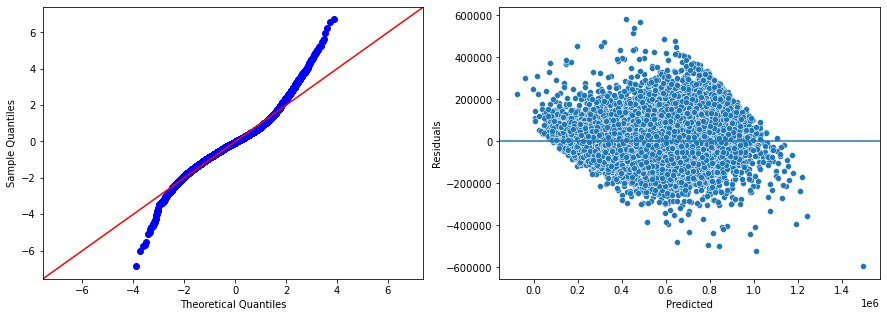

In [63]:
model = model_lin_reg(df=df_IQR_price)

In [64]:
model.pvalues[model.pvalues>0.05]

bedrooms         0.773793
zipcode_98002    0.436613
zipcode_98003    0.106306
zipcode_98030    0.853040
zipcode_98031    0.775410
zipcode_98032    0.053031
zipcode_98042    0.158899
zipcode_98092    0.273885
zipcode_98188    0.298986
zipcode_98198    0.490884
dtype: float64

Our model has higher R-squared and adjusted R-squared values at 0.826 compared to the prior model's 0.820 and 0.819. It is important to note that we achieved a better fit for our model based on these numbers and kept more data points compared to model 2.1. We will move forward with this model instead of using the prior one due to this reason. Additionally, compared to model 2.1, the 'lat' and 'long' columns are significant in this model so we are keeping them in.

Interestingly, we are seeing that bedrooms are no longer a significant coefficient, and therefore not a significant parameter to define the sales price of a home based on our model. This could be due to the overall above ground square footage being a better predictor of a home's value rather than bedroom counts.

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1166.
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:39   Log-Likelihood:            -2.6138e+05
No. Observations:               20439   AIC:                         5.229e+05
Df Residuals:                   20355   BIC:                         5.236e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.461e+07   3.39e+06     -4.308      0.000   -2.13e+07   -7.96e+06
bathrooms                        1.94e+04   1427.215     13.590      0.000    1.66e+04    2.22e+04
sqft_lot                           0.3005      0.017     18.011      0.000       0.268       0.333
floors                         -2.477e+04   1759.383    -14.078      0.000   -2.82e+04   -2.13e+04
waterfront                      1.501e+05   1.31e+04     11.495      0.000    1.25e+05    1.76e+05
view                            3.732e+04   1051.829     35.482      0.000    3.53e+04    3.94e+04
condition                       2.499e+04   1067.722     23.406      0.000    2.29e+04    2.71e+04
grade                           4.833e+04   1025.815     47.117      0.000    4.63e+04    5.03e+04
sqft_above                       131.5554      1.808     72.748      0.000     128.011     135.100
yr_built                        -571.7167     36.060    -15.855      0.000    -642.397    -501.036
lat                             1.546e+05   3.51e+04      4.406      0.000    8.58e+04    2.23e+05
long                           -6.562e+04   2.51e+04     -2.618      0.009   -1.15e+05   -1.65e+04
renovated                       3.364e+04   3724.476      9.032      0.000    2.63e+04    4.09e+04
has_basement                    4.717e+04   1636.087     28.833      0.000     4.4e+04    5.04e+04
zipcode_98002                   6079.6824   7819.678      0.777      0.437   -9247.516    2.14e+04
zipcode_98003                  -1.128e+04   6990.820     -1.613      0.107    -2.5e+04    2426.563
zipcode_98004                   4.749e+05   1.37e+04     34.573      0.000    4.48e+05    5.02e+05
zipcode_98005                   2.939e+05   1.39e+04     21.180      0.000    2.67e+05    3.21e+05
zipcode_98006                   2.484e+05   1.14e+04     21.768      0.000    2.26e+05    2.71e+05
zipcode_98007                   2.176e+05   1.42e+04     15.283      0.000     1.9e+05    2.46e+05
zipcode_98008                   2.005e+05   1.36e+04     14.751      0.000    1.74e+05    2.27e+05
zipcode_98010                   9.968e+04    1.2e+04      8.313      0.000    7.62e+04    1.23e+05
zipcode_98011                   8.508e+04   1.76e+04      4.824      0.000    5.05e+04     1.2e+05
zipcode_98014                   8.342e+04   1.94e+04      4.299      0.000    4.54e+04    1.21e+05
zipcode_98019                   5.968e+04   1.91e+04      3.126      0.002    2.23e+04    9.71e+04
zipcode_98022                   2.404e+04   1.05e+04      2.294      0.022    3502.443    4.46e+04
zipcode_98023                   -2.91e+04   6450.225     -4.512      0.000   -4.17e+04   -1.65e+04
zipcode_98024                   1.335e+05   1.72e+04      7.771      0.000    9.99e+04    1.67e+05
zipcode_98027 

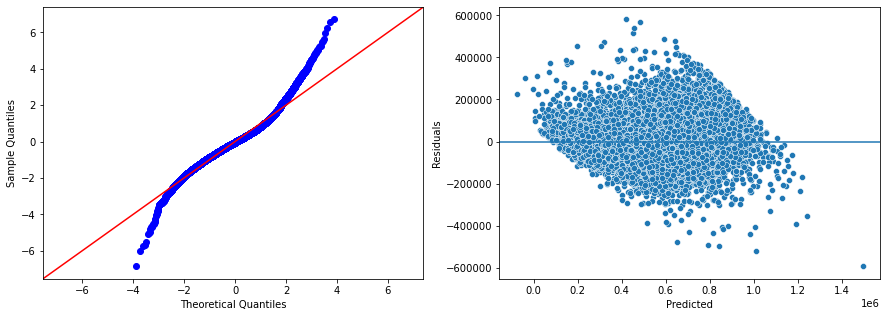

In [65]:
df_IQR_price.drop('bedrooms', axis=1, inplace=True)
model_non_scaled = model_lin_reg(df=df_IQR_price)

After removing the bedrooms column, we are left with no issues with any of the p-values for our parameters and as discussed above we still have R-squared and adjusted R-sqaured values of 0.826 with our residuals meeting the normality and homoscedasticity assumptions.

### Scaling 

Now that we have an accurate model we can go ahead and scale the data to see which of the parameters affect the price the most relative to other parameters.

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
df_IQR_price.columns

Index(['price', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'lat', 'long',
       'renovated', 'has_basement', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_9810

In [68]:
numeric_cols = [col for col in df_IQR_price.columns if (col.startswith('zipcode')==False) & (col.startswith('has')==False) & (col!='price')]

In [69]:
numeric_cols

['bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'lat',
 'long',
 'renovated']

In [70]:
df_scaled = df_IQR_price.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.head()

,price,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,renovated,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_larger_sqft_than_neighbors
0,221900.0,-1.481158,-0.223340,-0.886223,-0.050015,-0.268494,-0.628492,-0.512196,-0.726541,-0.542044,-0.323955,-0.306790,-0.177604,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,538000.0,0.278964,-0.183549,0.977307,-0.050015,-0.268494,-0.628492,-0.512196,0.635417,-0.679226,1.163507,-0.742422,5.630488,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,180000.0,-1.481158,-0.114614,-0.886223,-0.050015,-0.268494,-0.628492,-1.477415,-1.290585,-1.296546,1.283326,-0.138159,-0.177604,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,604000.0,1.335036,-0.239586,-0.886223,-0.050015,-0.268494,2.462772,-0.512196,-0.905384,-0.199088,-0.255892,-1.262369,-0.177604,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,510000.0,-0.073061,-0.162603,-0.886223,-0.050015,-0.268494,-0.628492,0.453023,-0.038683,0.555414,0.424739,1.182788,-0.177604,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Model 3 - Scaled Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1166.
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:41   Log-Likelihood:            -2.6138e+05
No. Observations:               20439   AIC:                         5.229e+05
Df Residuals:                   20355   BIC:                         5.236e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       3.303e+05      1e+04     32.877      0.000    3.11e+05     3.5e+05
bathrooms                       1.377e+04   1013.577     13.590      0.000    1.18e+04    1.58e+04
sqft_lot                        1.202e+04    667.475     18.011      0.000    1.07e+04    1.33e+04
floors                         -1.329e+04    944.113    -14.078      0.000   -1.51e+04   -1.14e+04
waterfront                      7489.9003    651.556     11.495      0.000    6212.797    8767.003
view                            2.385e+04    672.182     35.482      0.000    2.25e+04    2.52e+04
condition                       1.617e+04    690.800     23.406      0.000    1.48e+04    1.75e+04
grade                           5.007e+04   1062.780     47.117      0.000     4.8e+04    5.22e+04
sqft_above                      9.563e+04   1314.489     72.748      0.000    9.31e+04    9.82e+04
yr_built                       -1.667e+04   1051.449    -15.855      0.000   -1.87e+04   -1.46e+04
lat                             2.181e+04   4950.717      4.406      0.000    1.21e+04    3.15e+04
long                           -9339.4918   3566.940     -2.618      0.009   -1.63e+04   -2348.002
renovated                       5791.9948    641.256      9.032      0.000    4535.081    7048.909
has_basement                    4.717e+04   1636.087     28.833      0.000     4.4e+04    5.04e+04
zipcode_98002                   6079.6824   7819.678      0.777      0.437   -9247.516    2.14e+04
zipcode_98003                  -1.128e+04   6990.820     -1.613      0.107    -2.5e+04    2426.563
zipcode_98004                   4.749e+05   1.37e+04     34.573      0.000    4.48e+05    5.02e+05
zipcode_98005                   2.939e+05   1.39e+04     21.180      0.000    2.67e+05    3.21e+05
zipcode_98006                   2.484e+05   1.14e+04     21.768      0.000    2.26e+05    2.71e+05
zipcode_98007                   2.176e+05   1.42e+04     15.283      0.000     1.9e+05    2.46e+05
zipcode_98008                   2.005e+05   1.36e+04     14.751      0.000    1.74e+05    2.27e+05
zipcode_98010                   9.968e+04    1.2e+04      8.313      0.000    7.62e+04    1.23e+05
zipcode_98011                   8.508e+04   1.76e+04      4.824      0.000    5.05e+04     1.2e+05
zipcode_98014                   8.342e+04   1.94e+04      4.299      0.000    4.54e+04    1.21e+05
zipcode_98019                   5.968e+04   1.91e+04      3.126      0.002    2.23e+04    9.71e+04
zipcode_98022                   2.404e+04   1.05e+04      2.294      0.022    3502.443    4.46e+04
zipcode_98023                   -2.91e+04   6450.225     -4.512      0.000   -4.17e+04   -1.65e+04
zipcode_98024                   1.335e+05   1.72e+04      7.771      0.000    9.99e+04    1.67e+05
zipcode_98027 

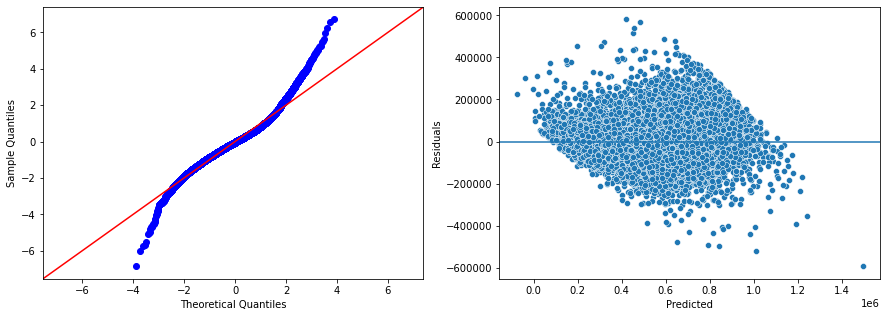

In [71]:
model = model_lin_reg(df=df_scaled)

There are no changes to our R-squared or p-values since we are merely scaling model 2.2 to be able to interpret effect sizes of the different parameters. The residuals also did not change since we did not change any of our model.

# iNTERPRET

## Final Scaled Coefficients

In [72]:
coeffs = model.params.sort_values().to_frame('coeffs')
coeffs['abs'] = coeffs['coeffs'].abs()
coeffs.sort_values('abs', ascending=False, inplace=True)

### Non-zipcode Parameters

In [73]:
coeffs[~coeffs.index.str.startswith('zipcode')]

,coeffs,abs
Intercept,330273.764168,330273.764168
sqft_above,95626.887282,95626.887282
grade,50074.835277,50074.835277
has_basement,47173.818402,47173.818402
view,23850.371935,23850.371935
lat,21810.707948,21810.707948
has_larger_sqft_than_neighbors,-17192.309109,17192.309109
yr_built,-16670.283873,16670.283873
condition,16169.003737,16169.003737
bathrooms,13774.717849,13774.717849


When compared to each other, we are seeing that the top 3 parameters that affect the sales price of a home that can be changed through a renovation are the total sqft above ground, the grade of construction/finishes as well as whether the house had a finished basement or not.

In [74]:
df_sqft_above = df_IQR_price.loc[:,['price','sqft_above']]

In [75]:
df_sqft_above = df_sqft_above.groupby('sqft_above').mean().reset_index()

## Data Visualizations

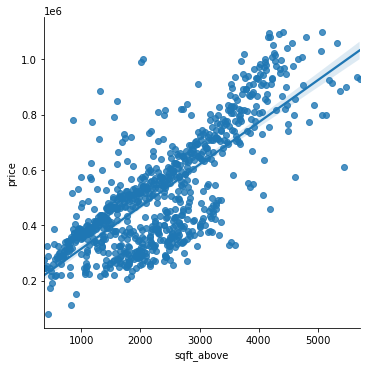

In [76]:
sns.lmplot(x='sqft_above', y='price', data=df_sqft_above)

In [77]:
print(df_sqft_above['sqft_above'].min())
print(df_sqft_above['sqft_above'].max())

370
5710


In [78]:
def categorize(x):
    if (x<1000) & (x > 0):
        val = 'Up to 1000 SF'
    elif (x>=1000) & (x<2000):
        val = '1000-2000 SF'
    elif (x>=2000) & (x<3000):
        val = '2000-3000 SF'
    elif (x>=3000) & (x<4000):
        val = '3000 - 4000 SF'
    elif (x>=4000) & (x<5000):
        val = '4000 - 5000 SF'
    else:
        val = '5000+ SF'
    return val

In [79]:
df_sqft_above['Category'] = df_sqft_above['sqft_above'].map(lambda x: categorize(x))

In [80]:
df_sqft_above['Category'].value_counts()

2000-3000 SF      272
1000-2000 SF      263
3000 - 4000 SF    151
Up to 1000 SF      78
4000 - 5000 SF     60
5000+ SF           12
Name: Category, dtype: int64

In [81]:
mean_price_per_cat = df_sqft_above.groupby('Category')['price'].mean().reset_index()

In [82]:
mean_price_per_cat

,Category,price
0,1000-2000 SF,403132.561189
1,2000-3000 SF,496939.230583
2,3000 - 4000 SF,694294.614732
3,4000 - 5000 SF,908895.025397
4,5000+ SF,907491.666667
5,Up to 1000 SF,321905.992281


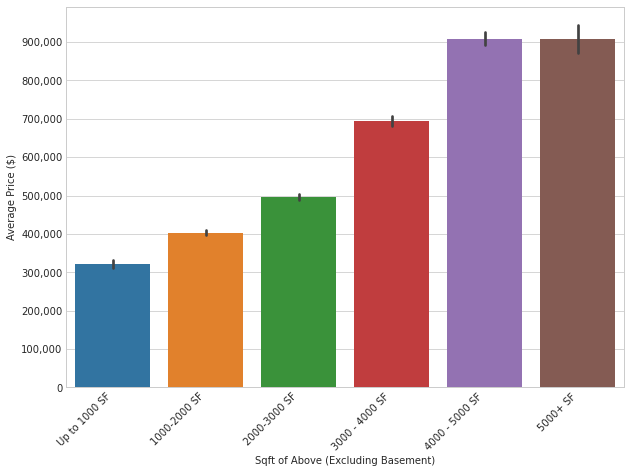

In [83]:
from matplotlib.ticker import FuncFormatter
order = ['Up to 1000 SF', '1000-2000 SF', '2000-3000 SF', '3000 - 4000 SF', '4000 - 5000 SF', '5000+ SF']
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.barplot(data = df_sqft_above, x='Category', y= 'price', order=order, ci=68)
    ax.set_xlabel('Sqft of Above (Excluding Basement)')
    ax.set_ylabel('Average Price ($)')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')));
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticks(range(0,1000000,100000))

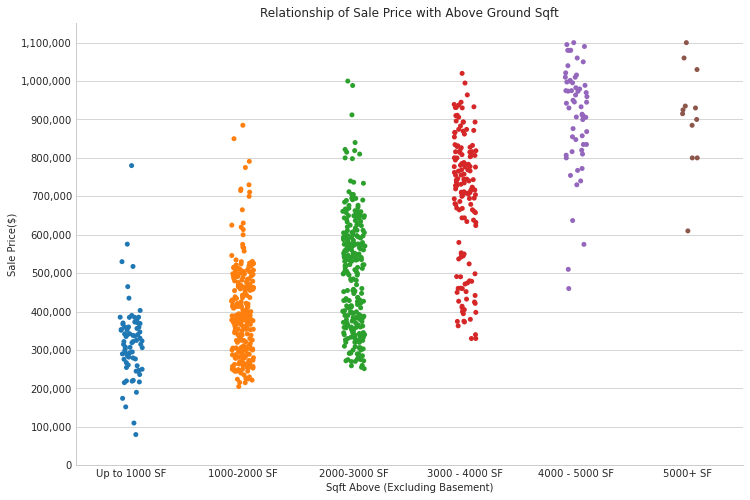

In [84]:
with plt.style.context('seaborn-whitegrid'):
    sns.catplot(data = df_sqft_above, x='Category', y='price', aspect=1.5, order=order)
    ax = plt.gca()
    fig = plt.gcf()
    ax.set_yticks(range(0,1200000,100000))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_ylabel('Sale Price($)')
    fig.set_size_inches(10, 7)
    ax.set_xlabel('Sqft Above (Excluding Basement)')
    ax.set_title('Relationship of Sale Price with Above Ground Sqft')
#     sns.pointplot(x= 'Category', y='price', data=mean_price_per_cat, order=order)

As can be seen above, as the square footage of the house increased sale price of the home also tended to increase with it. Even though there is a spread of price at each category of square footage and therefore some overlaps between them, there is a clear positive trend between sale price and square footage above ground. Additionally, it should be noted that as the square footage increases the minimum sale price of the category is consistently increasing as well indicating that even if the house may not be optimal per other parameters, having a certain amount of square footage tends to make it more valuable.

In [85]:
df_IQR_price['has_basement'] = df_IQR_price['has_basement'].astype(bool)

<ipython-input-85-8ecde1b6317e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR_price['has_basement'] = df_IQR_price['has_basement'].astype(bool)


In [86]:
df_basement = df_IQR_price.loc[:,['price','has_basement']]
df_basement_price = df_basement.groupby('has_basement')['price'].mean()

In [87]:
df_basement_price = df_basement_price.to_frame().reset_index()

In [88]:
df_basement_price

,has_basement,price
0,False,451003.365626
1,True,520135.677810


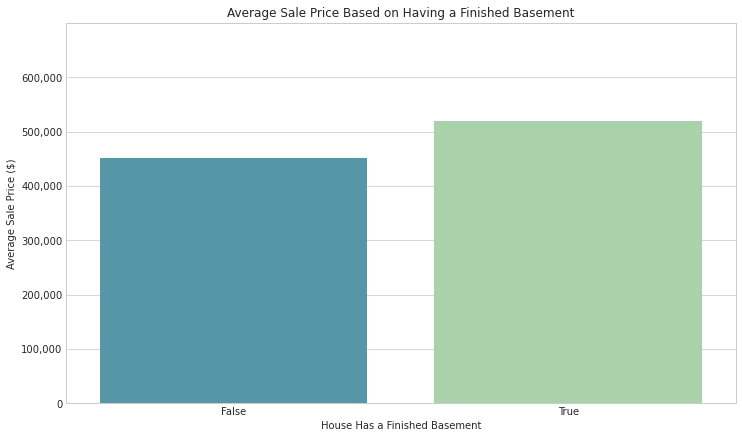

In [89]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data = df_basement_price, x='has_basement', y= 'price', palette=sns.color_palette("Spectral_r"))
    ax.set_xlabel('House Has a Finished Basement')
    ax.set_ylabel('Average Sale Price ($)')
    ax.set_title('Average Sale Price Based on Having a Finished Basement')
    ax.set_ylim(0,700000)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_yticks(range(0,700000,100000));

Exploring the relationship between having a finished basement and the sale price, we see that homes that had finished basements had a higher average sale price of approximately 520,000 dollars compared to homes that did not at approximately 451,000 dollars.

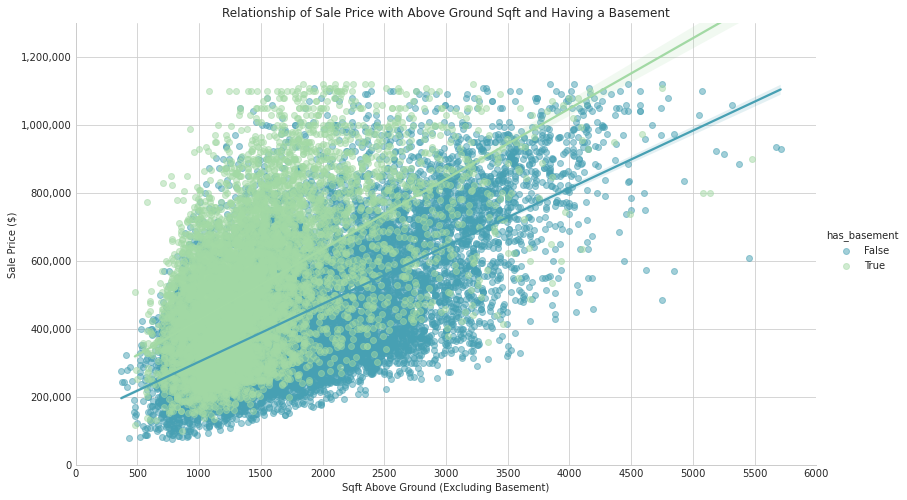

In [90]:
from matplotlib.ticker import FuncFormatter
with plt.style.context('seaborn-whitegrid'):

    sns.lmplot(x='sqft_above', y='price', data=df_IQR_price, hue='has_basement', 
               aspect=2, scatter_kws=dict(alpha=0.5), palette=sns.color_palette("Spectral_r"))
    ax = plt.gca()
    ax.set_xlabel('Sqft Above Ground (Excluding Basement)')
    ax.set_ylabel('Sale Price ($)')
    ax.set_title("Relationship of Sale Price with Above Ground Sqft and Having a Basement")
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.xaxis.set_ticks(range(0,6500,500))
    ax.set_ylim(0, 1300000)
    plt.gcf().set_size_inches(12,7);

When we look at the relationship between square footage above ground and the home's sale price again, but add in a second parameter to define whether the house had a basement or not, the houses with a basement have a slightly more positive relationship with the sale price. So if a house had a basement, it tended to have a slightly higher price than a comparable home. This is visible from the difference of slopes between the two lines shown above where the green line is diverging from the blue line in a positive way.

In [91]:
df_grade = df_IQR_price.loc[:,['price','grade']]
df_grade

,price,grade
0,221900.0,7
1,538000.0,7
2,180000.0,6
3,604000.0,7
4,510000.0,8
...,...,...
21592,360000.0,8
21593,400000.0,8
21594,402101.0,7
21595,400000.0,8


In [92]:
def categorize_grade(x):
    if (x<7):
        val = 'Below Average'
    elif (x<=8) & (x>6):
        val = 'Average'
    else:
        val = 'Above Average'
    
    return val

In [93]:
df_grade['Category'] = df_grade['grade'].map(lambda x: categorize_grade(x))

In [94]:
df_grade['Category'].value_counts()

Average          14905
Above Average     3227
Below Average     2307
Name: Category, dtype: int64

In [95]:
df_grade
df_grade_sqft = pd.concat([df_grade, pd.DataFrame(df_IQR_price['sqft_above'])], axis=1)
df_grade_sqft

,price,grade,Category,sqft_above
0,221900.0,7,Average,1180
1,538000.0,7,Average,2170
2,180000.0,6,Below Average,770
3,604000.0,7,Average,1050
4,510000.0,8,Average,1680
...,...,...,...,...
21592,360000.0,8,Average,1530
21593,400000.0,8,Average,2310
21594,402101.0,7,Average,1020
21595,400000.0,8,Average,1600


In [96]:
mean_price_per_grade = df_grade.groupby('Category')['price'].mean().reset_index()
mean_price_per_grade

,Category,price
0,Above Average,726319.069724
1,Average,450805.678497
2,Below Average,294856.879931


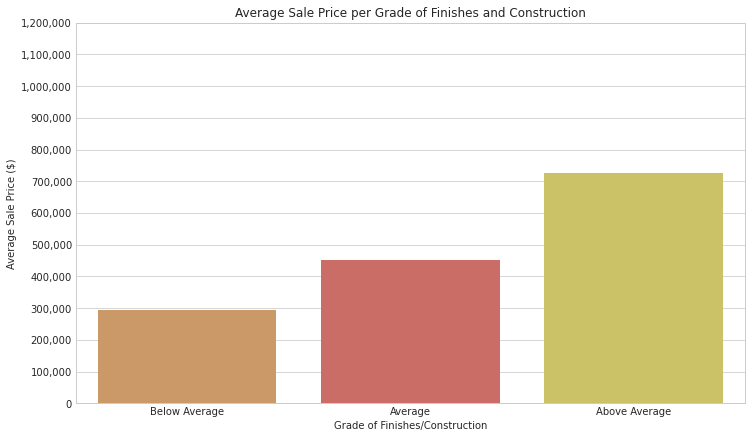

In [97]:
with plt.style.context('seaborn-whitegrid'):
    order=['Below Average', 'Average', 'Above Average']
    p = sns.color_palette("hls", 14)
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data = mean_price_per_grade, x='Category', y= 'price', order=order, 
                palette=[p[1], p[0], p[2]])
    ax.set_xlabel('Grade of Finishes/Construction')
    ax.set_ylabel('Average Sale Price ($)')
    ax.set_title('Average Sale Price per Grade of Finishes and Construction')
    ax.set_ylim(0,1200000)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')));
    ax.set_yticks(range(0,1300000,100000))

Another interesting, but also expected relationship is between the grade of finishes and the sale price. Houses that had higher grades of finishes and a better construction quality sold for higher prices.

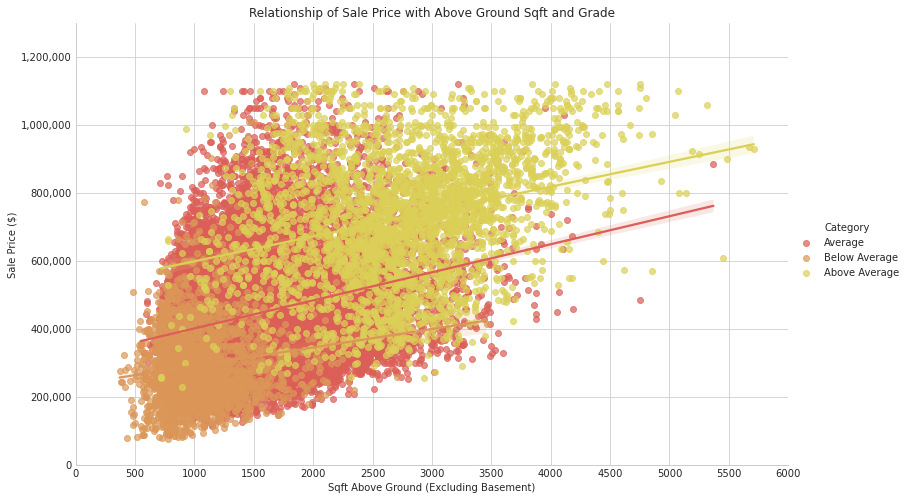

In [98]:
from matplotlib.ticker import FuncFormatter
with plt.style.context('seaborn-whitegrid'):

    sns.lmplot(x='sqft_above', y='price', data=df_grade_sqft, hue='Category', 
               aspect=2, scatter_kws=dict(alpha=0.7), palette=sns.color_palette("hls", 14))
    ax = plt.gca()
    ax.set_xlabel('Sqft Above Ground (Excluding Basement)')
    ax.set_ylabel('Sale Price ($)')
    ax.set_title("Relationship of Sale Price with Above Ground Sqft and Grade")
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.xaxis.set_ticks(range(0,6500,500))
    ax.set_ylim(0, 1300000)
    plt.gcf().set_size_inches(12,7);

When grade is plotted with square footage above ground, the relationship shown in the previous visual becomes even more apparent. As can be seen from the different colored data points, above average homes tended to have a higher sale price. The regression lines for average and above average have a higher positive slope compared to the below average homes, which means that as the square footage of a home increases, the higher graded homes will tend to have higher prices. 

# CONCLUSIONS & RECOMMENDATIONS

Even though renovations are usually a lot of effort and stressful to lots of homeowners, they may help increase the property's value. To sum up, our analysis for King County, Washington showed the following:

- Increasing the square footage above ground tends to increase the house's value.
- Focusing on the grade of finishes and the quality of construction as a whole tends to pay dividends when it comes to selling the house.
- Having a basement is the third most effective parameter in increasing a home's sale price.

Our first recommendation based on our findings above would be for the homeowner to renovate their house and add livable above ground square footage to the property. This could be in the shape of an added extension to the home or a simpler approach of finishing the attic space.

Secondly, we would advise the homeowner to also focus their renovation efforts on the finishes and quality of the materials that they would be choosing to use. This could include components such as kitchen countertop material, cabinetry design, bathroom fixtures, general lighting design and fixture choices inside and outside the house, flooring.

Lastly, we would propose that the homeowner add a basement to their home. It should be noted that since we do not know what the construction costs of this undertaking would be like versus the gain in the home's sale price, it is difficult to predict the outcome (refer to the Limitations & Next Steps section for more information on this). However, based on our model, we found that having a basement for homes was the third most effective parameter. If the home already has a basement, but the basement is unfinished, our recommendation would be for the homeowner to make the basement an occupiable space by finishing it.
## Limitations & Next Steps
Given more time and information about what the homeowner's renovation budget would be, we would have wanted to analyze whether these top 3 parameters would truly be the most effective in bringing a net value increase since a renovation such as adding a basement to a home would be very costly and may not end up returning a net value increase. Additionally, the construction costs in the state of Washington may be higher than other states due to factors such as permitting, material costs, logistical challenges etc. which may effect the net value increase as well. Furthermore, having information about whether the homeowner is thinking about living in the renovated house or renting it out would allow us to fine tune our analysis and bring more valuable insight.

# Appendix A: Effect of Zipcodes on Home Sale Price

In [99]:
coeffs[coeffs.index.str.startswith('zipcode')]

,coeffs,abs
zipcode_98039,602853.692039,602853.692039
zipcode_98004,474874.562216,474874.562216
zipcode_98040,390372.947380,390372.947380
zipcode_98112,368770.378411,368770.378411
zipcode_98109,343272.529402,343272.529402
...,...,...
zipcode_98092,-7660.186920,7660.186920
zipcode_98002,6079.682440,6079.682440
zipcode_98198,5236.410829,5236.410829
zipcode_98031,2269.272420,2269.272420


In [100]:
c = coeffs.reset_index()
c.head()

,index,coeffs,abs
0,zipcode_98039,602853.692039,602853.692039
1,zipcode_98004,474874.562216,474874.562216
2,zipcode_98040,390372.947380,390372.947380
3,zipcode_98112,368770.378411,368770.378411
4,zipcode_98109,343272.529402,343272.529402


In [101]:
#database from https://www.unitedstateszipcodes.org/zip-code-database/
df_zipcode = pd.read_csv('reference/zip_code_database.csv')

In [102]:
df_zipcode[df_zipcode['zip']==98004]

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population_2015
41628,98004,STANDARD,0,Bellevue,"Beaux Arts, Clyde Hill, Hunts Point, Yarrow Point",Beaux Arts Village,WA,King County,America/Los_Angeles,425,NaN,US,47.61,-122.21,31250


In [103]:
zipcodes = {}
for val in c['index']:
    zipcodes[val[8:13]]=None

In [104]:
for value in list(zipcodes.keys()):
    if value.startswith('9'):
        continue
    else:
        del zipcodes[value]

In [105]:
df_zipcode['zip'] = df_zipcode['zip'].map(lambda x: str(x))

In [106]:
df_zipcode[df_zipcode['zip'] == '98004']

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population_2015
41628,98004,STANDARD,0,Bellevue,"Beaux Arts, Clyde Hill, Hunts Point, Yarrow Point",Beaux Arts Village,WA,King County,America/Los_Angeles,425,NaN,US,47.61,-122.21,31250


In [107]:
indx = []
for key in zipcodes.keys():
    for idx, cell in enumerate(df_zipcode['zip']):
        if cell == key:
            zipcodes[key]=df_zipcode.loc[idx,'primary_city']

In [108]:
#top 5 cities
print("Top 5 cities:", list(zipcodes.values())[0:5])

#top 5 zipcodes
print("Top 5 zipcodes:", list(zipcodes.keys())[0:5])

Top 5 cities: ['Medina', 'Bellevue', 'Mercer Island', 'Seattle', 'Seattle']
Top 5 zipcodes: ['98039', '98004', '98040', '98112', '98109']


These are the top 5 cities that had the highest effect on a home's sales price. Since the homeowner can not change their zipcodes with a renovation, we are only including this information as reference.